In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset.csv")

# Общая информация

In [2]:
print("Общая информация о датасете:")
print(df.info())
print("\n Описательная статистика:")
print(df.describe())

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  floa

# Распределение популярности треков

## Гипотеза

Большинство треков имеют низкую популярность, а очень популярные — редкость

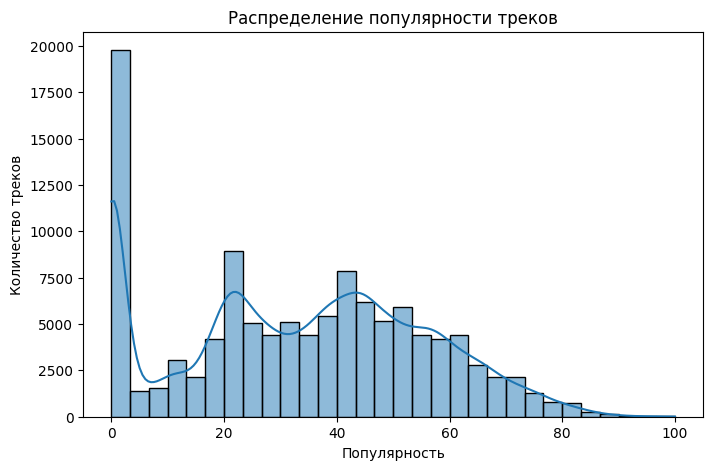

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Распределение популярности треков")
plt.xlabel("Популярность")
plt.ylabel("Количество треков")
plt.show()

### Вывод: видно, что большинство треков имеют популярность от 20 до 60, у почти 20000 песен популярность в районе 0, а популярные (83+) — редкость 

# Влияние explicit на популярность

## Гипотеза

Влияет ли нецензурная лексика на популярность трека? Предположим, что explicit чаще популярнее, т.к. встречается в современных жанрах

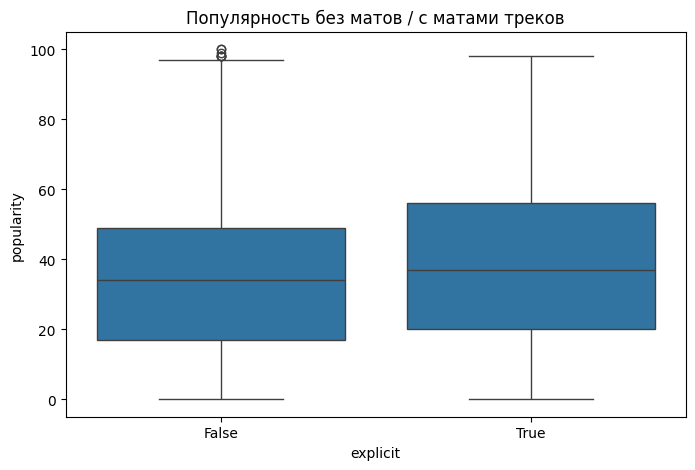

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="explicit", y="popularity", data=df)
plt.title("Популярность без матов / с матами треков")
plt.show()


### Вывод: Explicit-треки действительно чаще немного популярнее, но разница не критическая. То есть explicit влияет, но не является определяющим фактором

# Связь acousticness и популярности

## Гипотеза

Аккустические треки обычно менее популярны, чем современные.

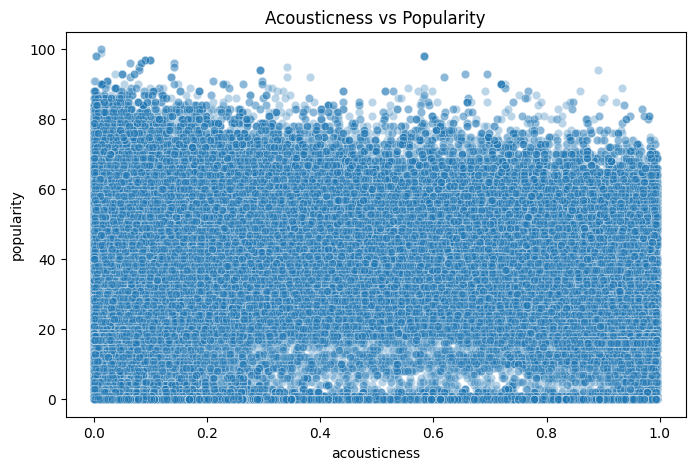

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="acousticness", y="popularity", data=df, alpha=0.3)
plt.title("Acousticness vs Popularity")
plt.show()

### Вывод: Гипотеза подтвердилась слабо. Высокая acousticness снижает вероятность высокой популярности, но это плохо заметно

# Какой жанр самый популярный?

## Гипотеза

Современные жанры rap, pop будут иметь более высокую среднюю популярность.

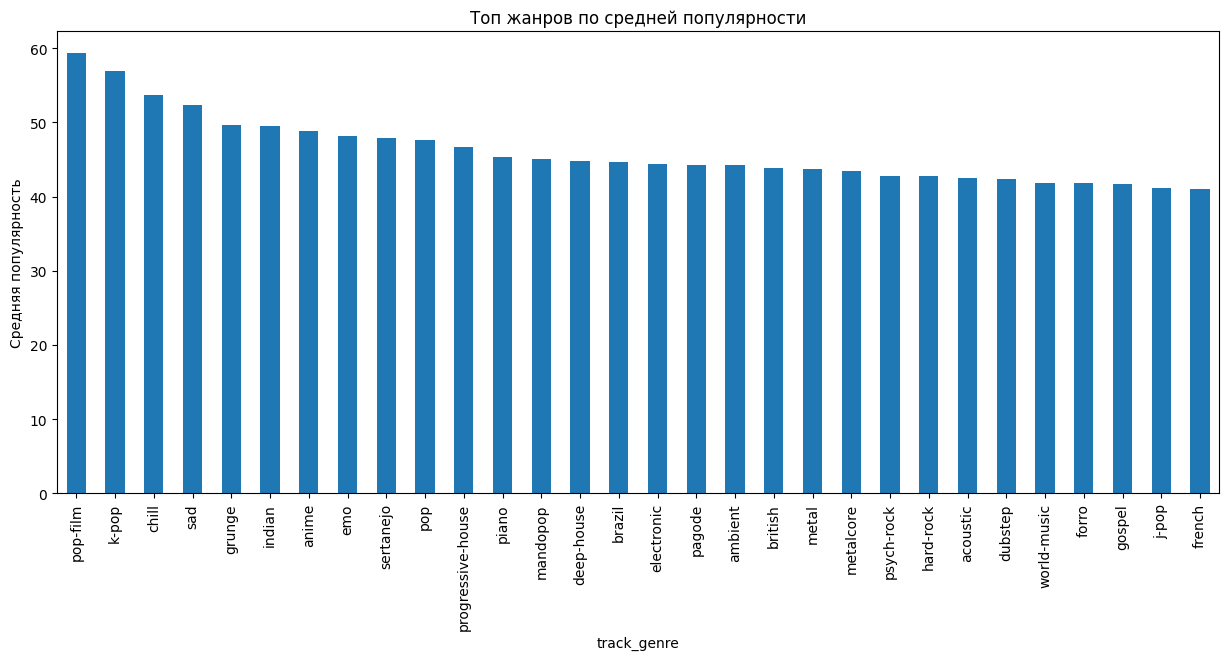

In [20]:
plt.figure(figsize=(15,6))
df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).head(30).plot(kind='bar')
plt.title("Топ жанров по средней популярности")
plt.ylabel("Средняя популярность")
plt.show()


### Вывод: Гипотеза подтвердилась частично, самый популярный pop-film, а rap вообще не попал на график

# Тепловая карта корреляций

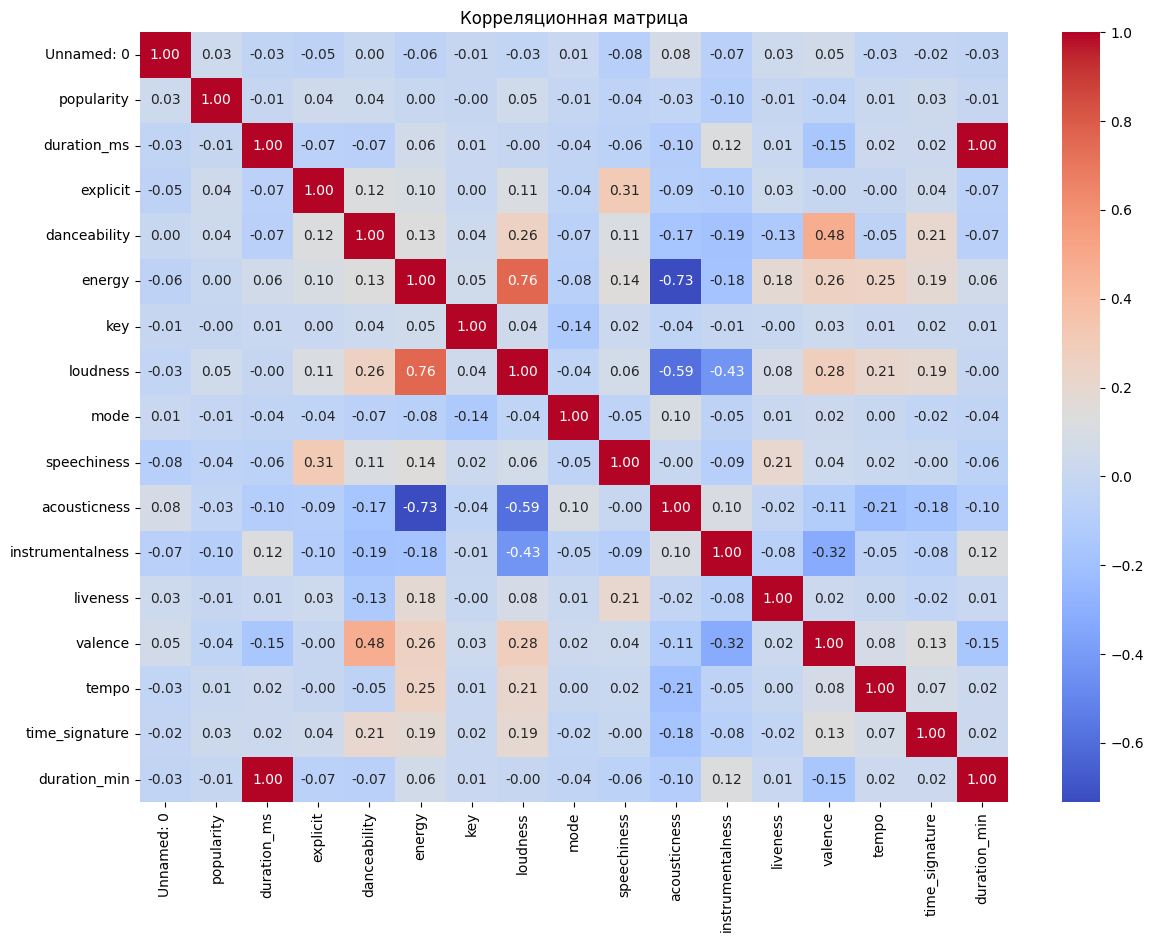

In [8]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# Вывод топ-10 признаков по корреляции с популярностью

In [9]:
target_corr = corr_matrix['popularity'].sort_values(ascending=False)
print("Топ признаков по корреляции с популярностью:\n", target_corr.head(10))

Топ признаков по корреляции с популярностью:
 popularity        1.000000
loudness          0.050423
explicit          0.044082
danceability      0.035448
Unnamed: 0        0.032142
time_signature    0.031073
tempo             0.013205
energy            0.001056
key              -0.003853
liveness         -0.005387
Name: popularity, dtype: float64


### Вывод: На популярность влияют в основном: громкость, сквернословие, танцевальность, энергичность